In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/data.csv')
df["Date"] = pd.to_datetime(df['Date'])
df.set_index(df['Date'],inplace=True)
df.drop(['Name','Date'],axis = 1,inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,39.83,40.36,39.30,40.19,12839400
2006-01-04,39.78,40.14,39.42,39.62,13491800
2006-01-05,39.61,39.81,39.50,39.74,8109400
2006-01-06,39.92,40.24,39.55,40.02,7966900
2006-01-09,39.88,40.72,39.88,40.67,16575200


In [4]:
df.isna().sum()

Open      1
High      0
Low       1
Close     0
Volume    0
dtype: int64

In [5]:
df['Open'] = df['Open'].interpolate(method = 'linear')
df['Low'] = df['Low'].interpolate(method = 'linear')

In [6]:
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

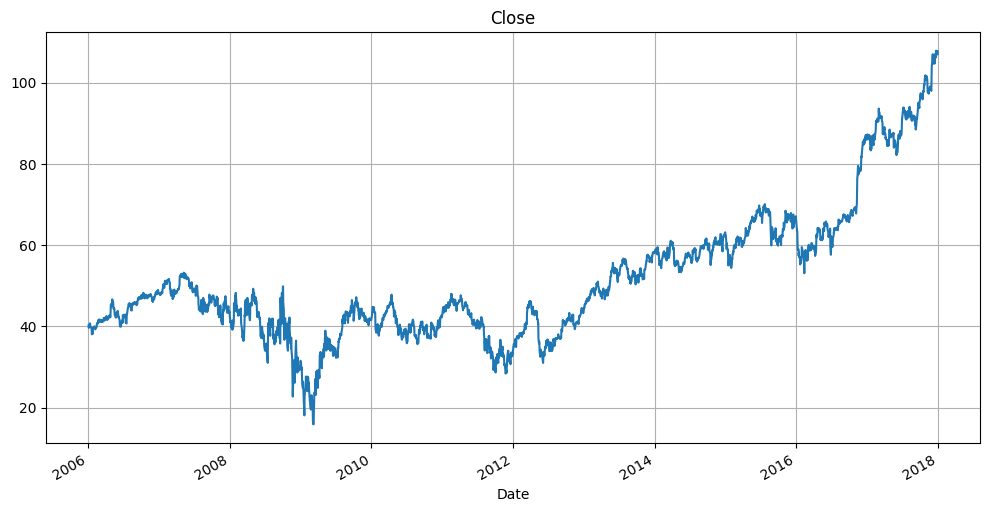

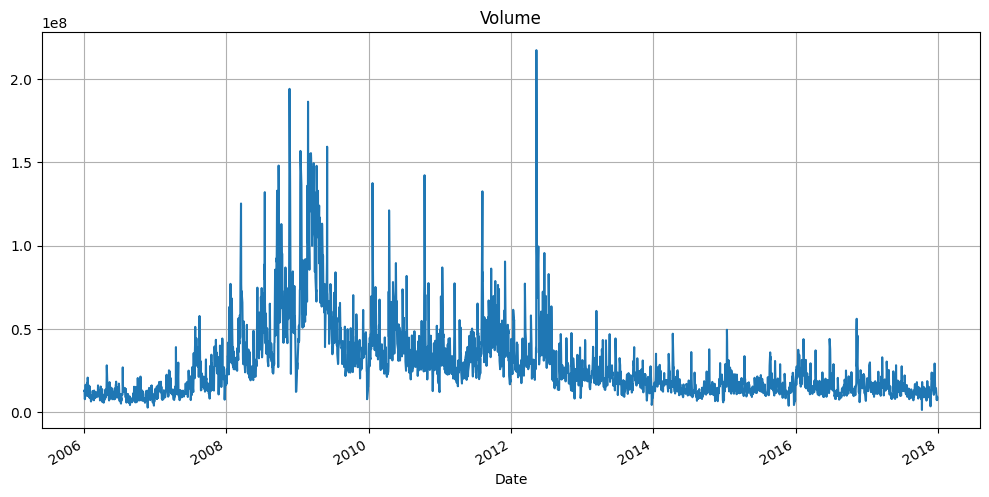

In [7]:
df['Close'].plot(figsize=(10,5))
plt.tight_layout()
plt.grid()
plt.title('Close')
plt.show()

df['Volume'].plot(figsize=(10,5))
plt.tight_layout()
plt.grid()
plt.title('Volume')
plt.show()

In [8]:
df.describe()

,Open,High,Low,Close,Volume
count,3020.000000,3020.000000,3020.000000,3020.000000,3.020000e+03
mean,51.441275,52.003682,50.863805,51.449000,2.826978e+07
std,16.345013,16.305575,16.400725,16.354875,2.298042e+07
min,15.370000,17.290000,14.960000,15.900000,1.493431e+06
25%,40.690000,41.240000,40.115000,40.687500,1.344652e+07
50%,46.665000,47.130000,46.045000,46.580000,2.084437e+07
75%,59.367500,59.822500,58.840000,59.392500,3.494302e+07
max,108.200000,108.460000,107.160000,107.830000,2.172942e+08


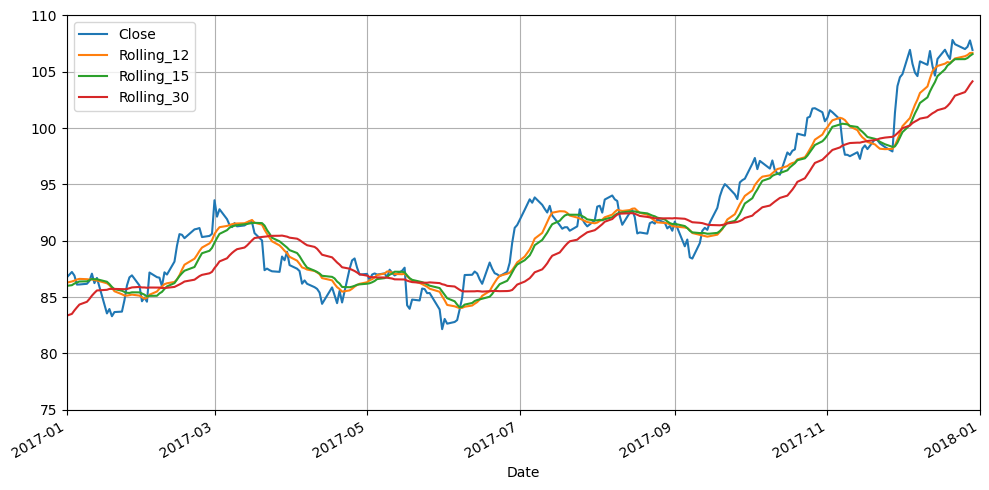

In [9]:
df['Rolling_12'] = df['Close'].rolling(12).mean()
df['Rolling_15'] = df['Close'].rolling(15).mean()
df['Rolling_30'] = df['Close'].rolling(30).mean()

df['Rolling_Std'] = df['Close'].rolling(12).std()

df[['Close','Rolling_12','Rolling_15','Rolling_30']].plot(xlim = ['2017','2018'],ylim = [75,110],figsize=(10,5))
plt.tight_layout()
plt.grid()

df.drop(['Rolling_15','Rolling_30'],axis = 1,inplace=True)

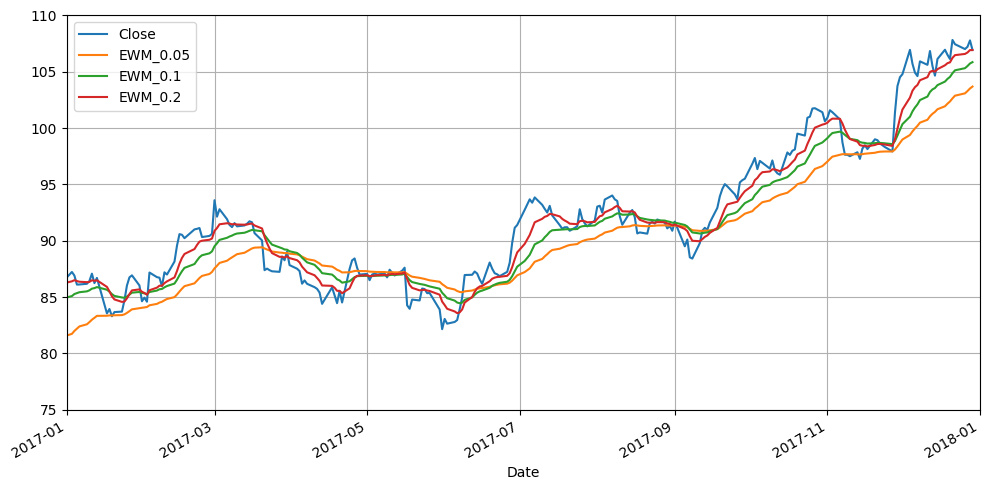

In [10]:
df['EWM_0.05'] = df['Close'].ewm(alpha=0.05).mean()
df['EWM_0.1'] = df['Close'].ewm(alpha=0.1).mean()
df['EWM_0.2'] = df['Close'].ewm(alpha=0.2).mean()

df[['Close','EWM_0.05','EWM_0.1','EWM_0.2']].plot(xlim = ['2017','2018'],ylim = [75,110],figsize=(10,5))
plt.tight_layout()
plt.grid()

df.drop(['EWM_0.05','EWM_0.2'],axis = 1,inplace = True)

<Figure size 3200x2400 with 0 Axes>

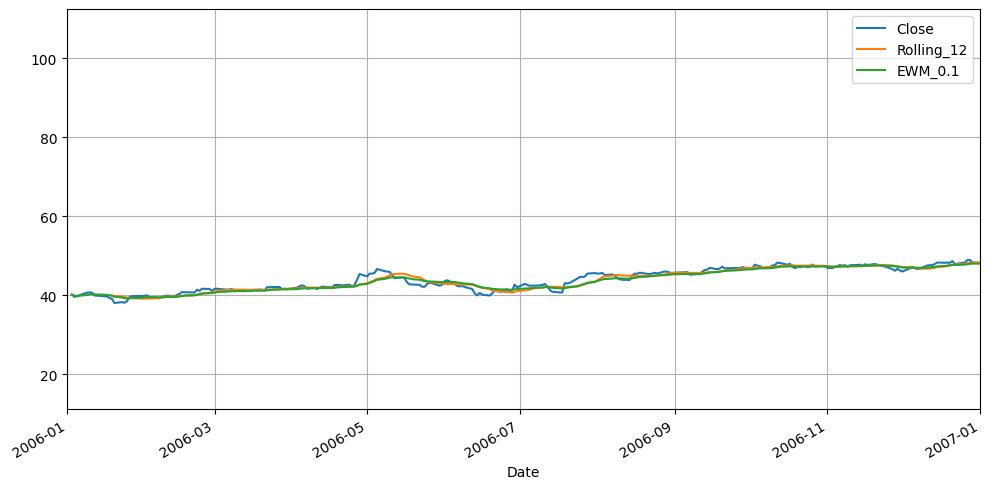

<Figure size 3200x2400 with 0 Axes>

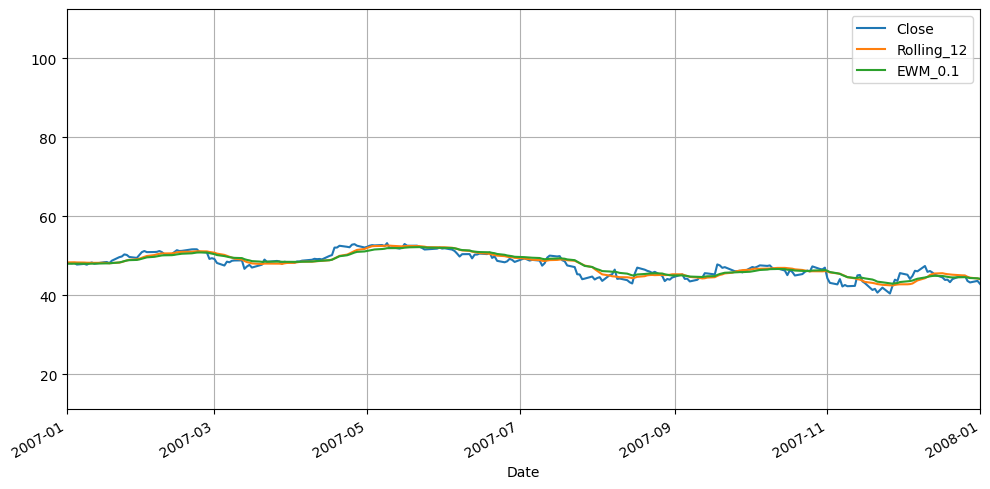

<Figure size 3200x2400 with 0 Axes>

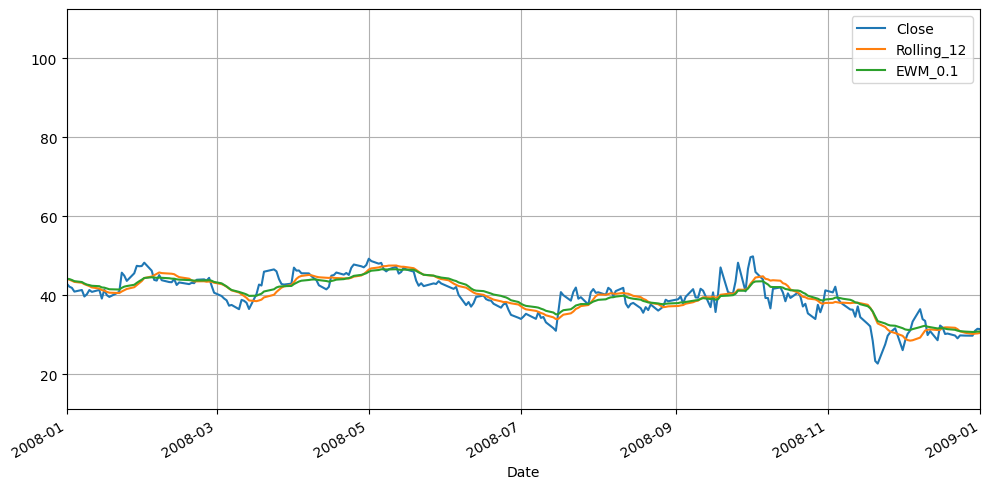

<Figure size 3200x2400 with 0 Axes>

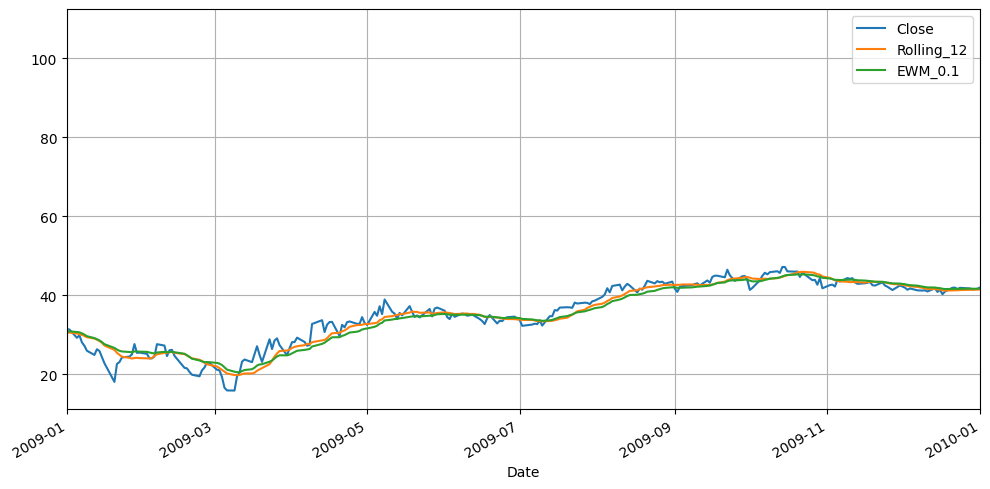

<Figure size 3200x2400 with 0 Axes>

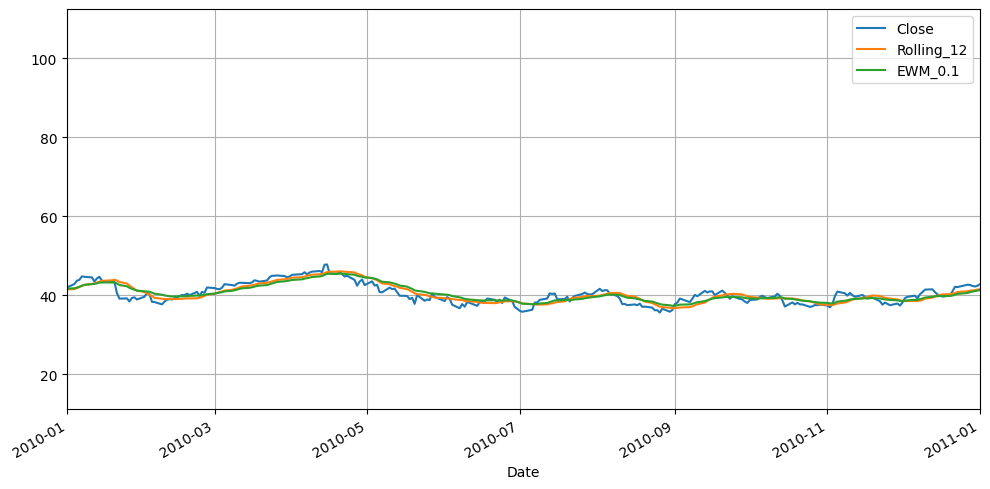

<Figure size 3200x2400 with 0 Axes>

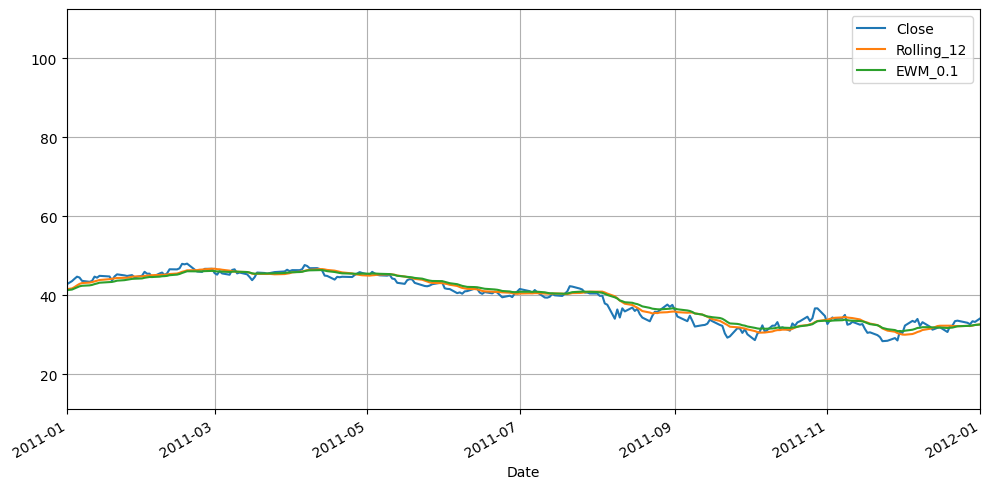

<Figure size 3200x2400 with 0 Axes>

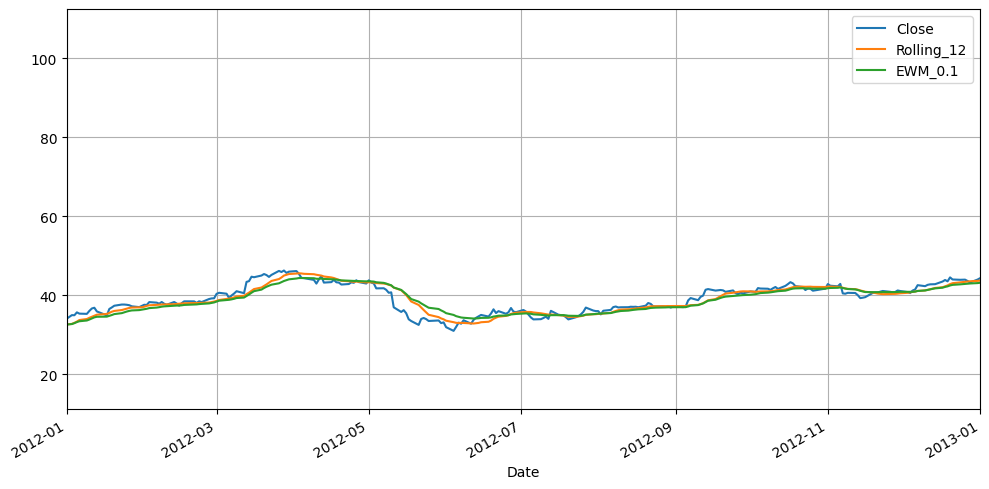

<Figure size 3200x2400 with 0 Axes>

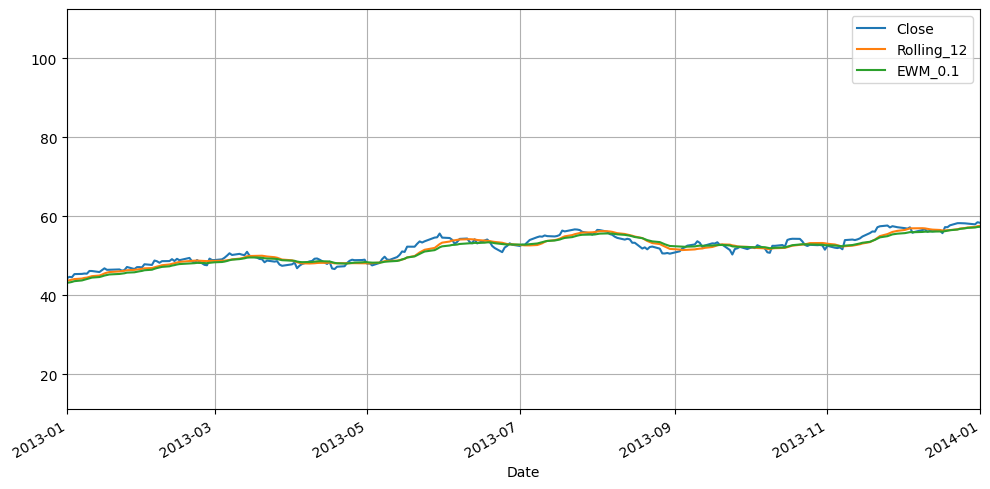

<Figure size 3200x2400 with 0 Axes>

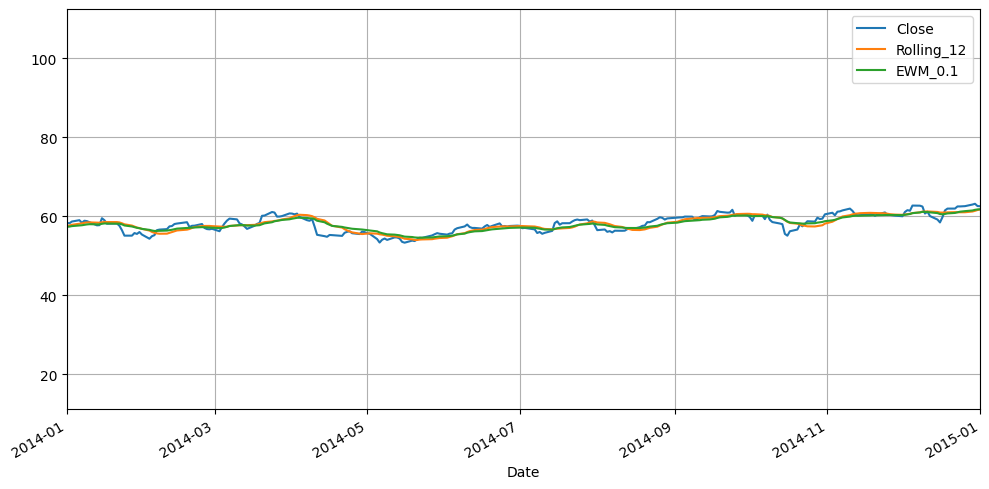

<Figure size 3200x2400 with 0 Axes>

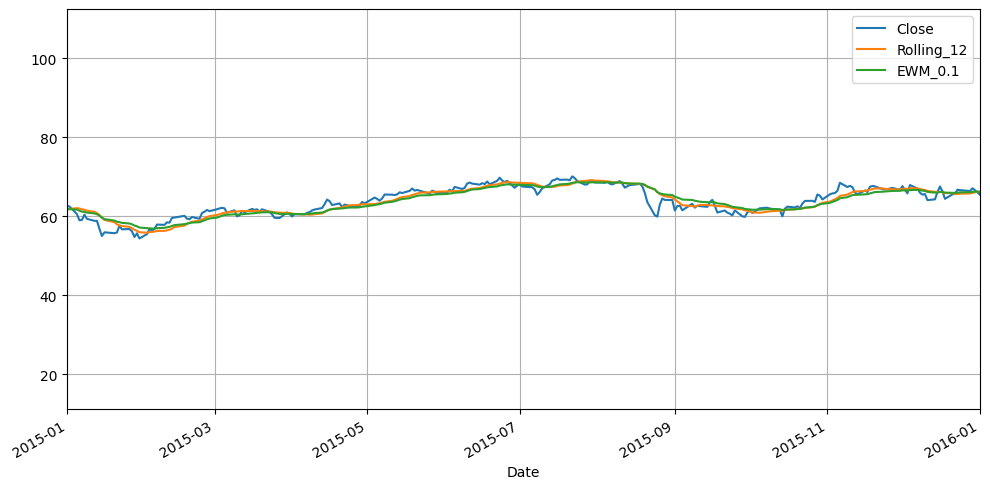

<Figure size 3200x2400 with 0 Axes>

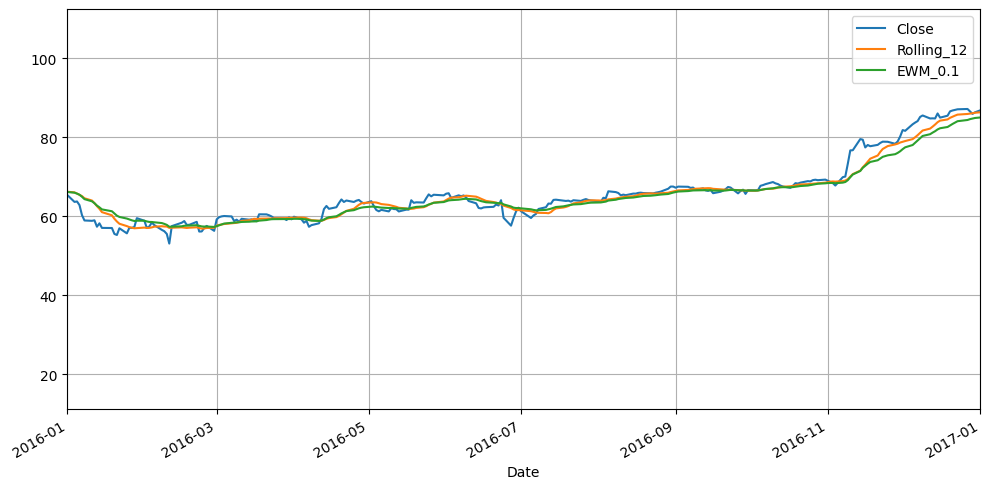

In [11]:
#This plot shows how EWM captures the trend better than Rolling
years = list(df.index.year.unique())
for i in range(len(years)-1):
    plt.figure(dpi = 500)
    df[['Close','Rolling_12','EWM_0.1']].plot(xlim = [str(years[i]),str(years[i+1])],figsize=(10,5))
    plt.tight_layout()
    plt.grid()
    plt.show()

In [12]:
years.append([2018,2019])

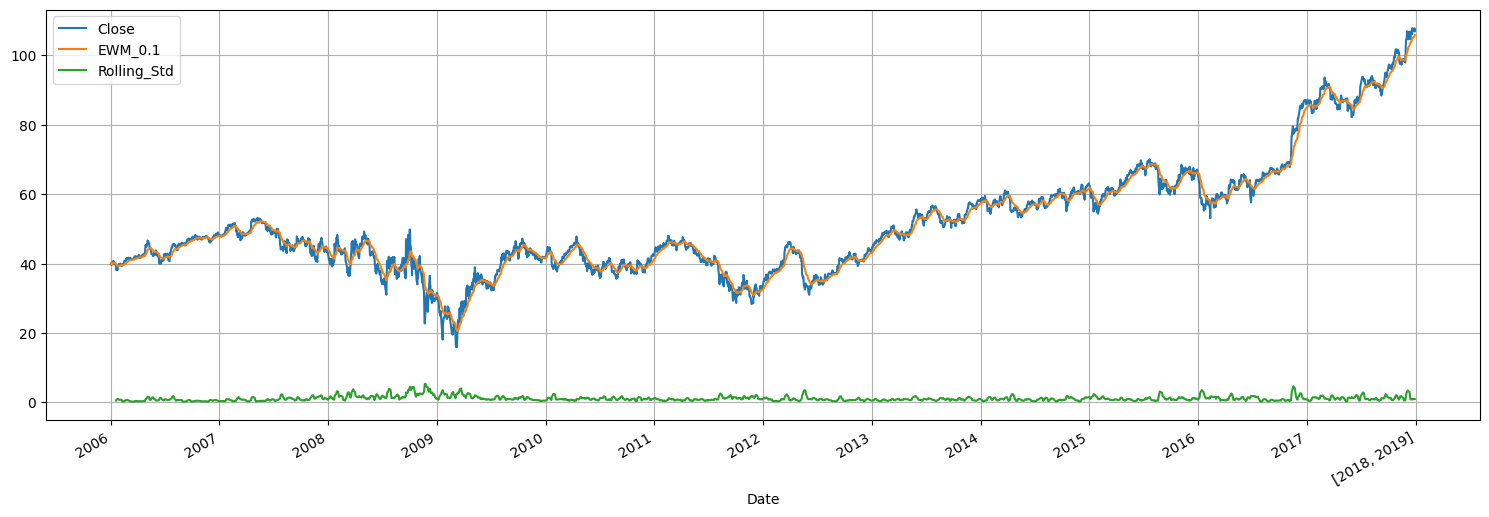

In [13]:
dates = pd.date_range(start = '2006',end = '2018',freq = 'YS')

df[['Close','EWM_0.1','Rolling_Std']].plot(figsize = (15,5))
plt.tight_layout()
plt.xticks(dates,labels = years)
plt.grid()

In [14]:
df.drop(['Rolling_Std','EWM_0.1','Rolling_12'],axis = 1,inplace = True)

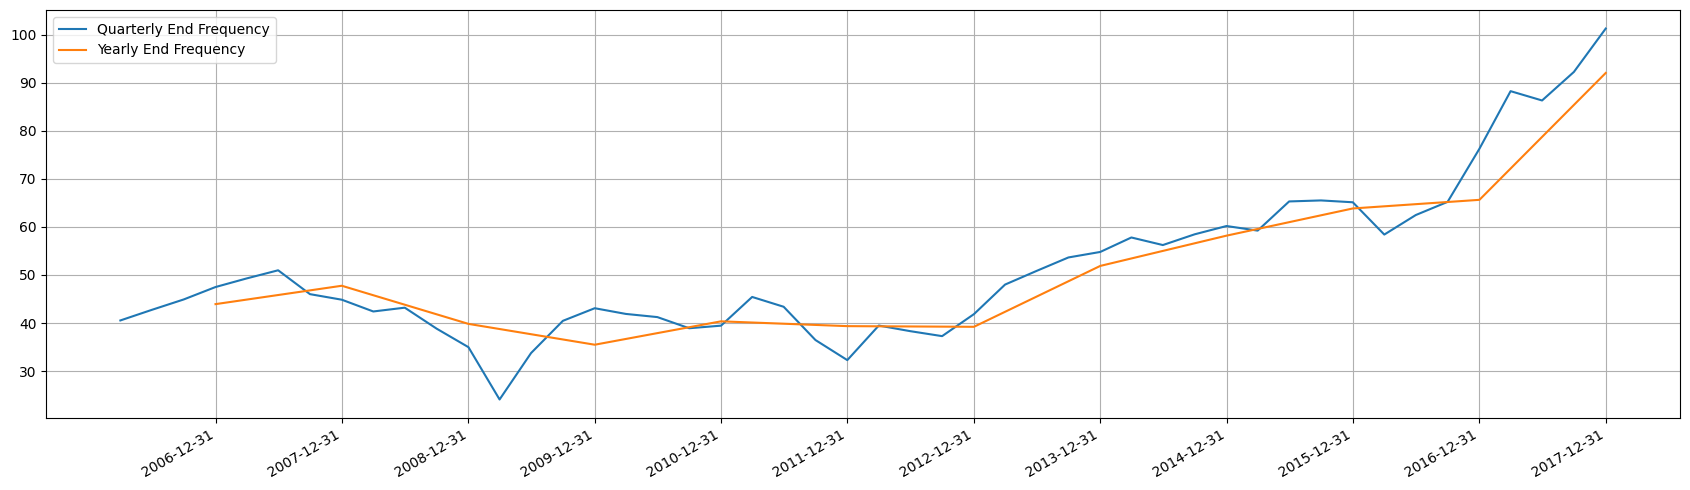

In [15]:
index = pd.date_range(start = '2006',end = '2018',freq = 'A')

figure,axis = plt.subplots(figsize = (17,5))
figure.autofmt_xdate()
axis.plot(df['Close'].resample(rule = 'Q').mean(),label = 'Quarterly End Frequency')
axis.plot(df['Close'].resample(rule = 'A').mean(),label = 'Yearly End Frequency')
plt.xticks(index)
plt.legend(loc = 'best')
plt.tight_layout()
plt.grid()

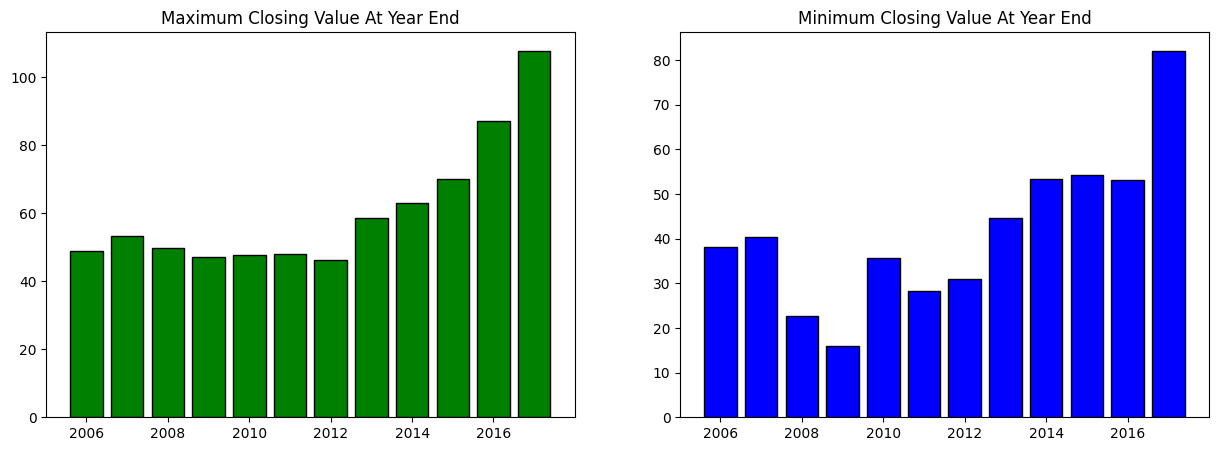

In [16]:
fig,ax = plt.subplots(1,2,figsize = (15,5))

ax[0].bar(years[:-1],df['Close'].resample(rule = 'A').max(),color = 'green',edgecolor = 'black')
ax[1].bar(years[:-1],df['Close'].resample(rule = 'A').min(),color = 'blue',edgecolor = 'black')

ax[0].title.set_text('Maximum Closing Value At Year End')
ax[1].title.set_text('Minimum Closing Value At Year End')

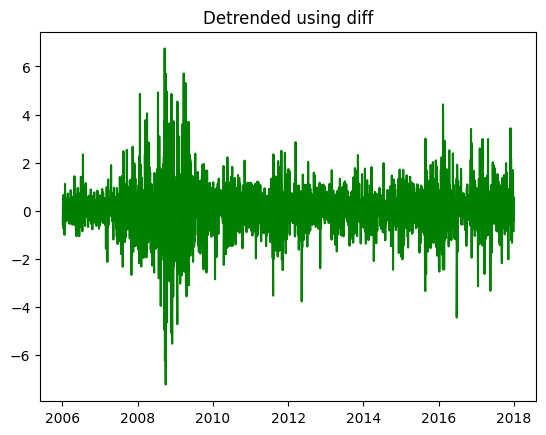

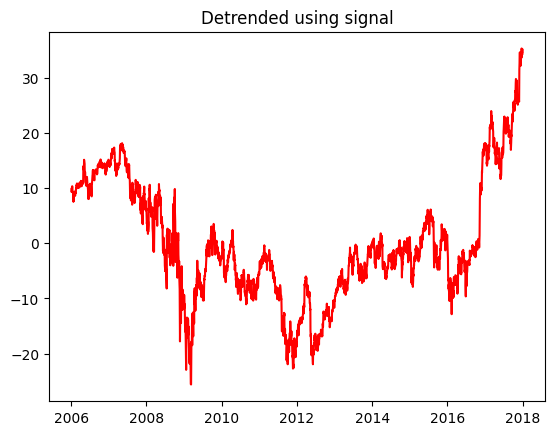

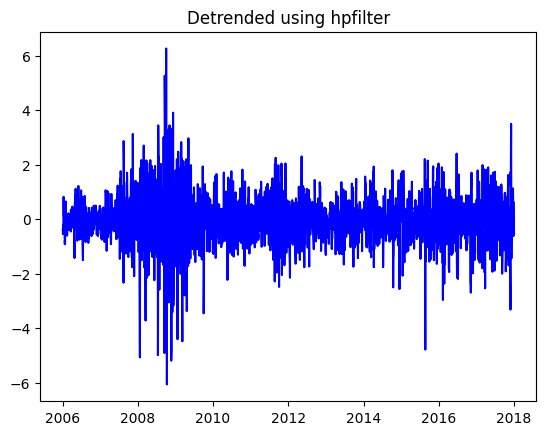

In [17]:
from scipy import signal
from statsmodels.tsa.filters.hp_filter import hpfilter

df['diff'] = df['Close'].diff()
plt.plot(df['diff'],color = 'g')
plt.title('Detrended using diff')
df.drop('diff',axis = 1,inplace = True)
plt.show()

df['signal'] = signal.detrend(df.Close.values)
plt.plot(df['signal'],color = 'r')
plt.title('Detrended using signal')
plt.show()
df.drop('signal',axis = 1,inplace = True)

sw_cycle,sw_trend = hpfilter(df.Close, lamb = 120)
df['hptrend'] = df['Open'] - sw_trend
plt.plot(df['hptrend'],color = 'b')
plt.title('Detrended using hpfilter')
plt.show()
df.drop('hptrend',axis = 1,inplace = True)

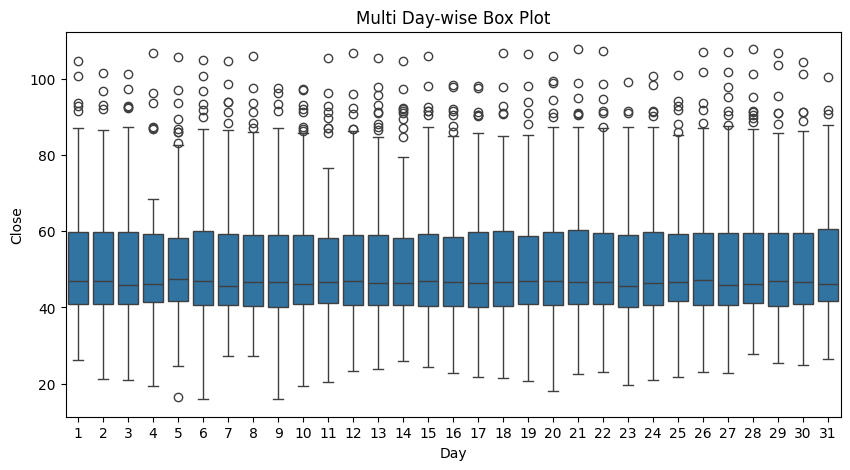

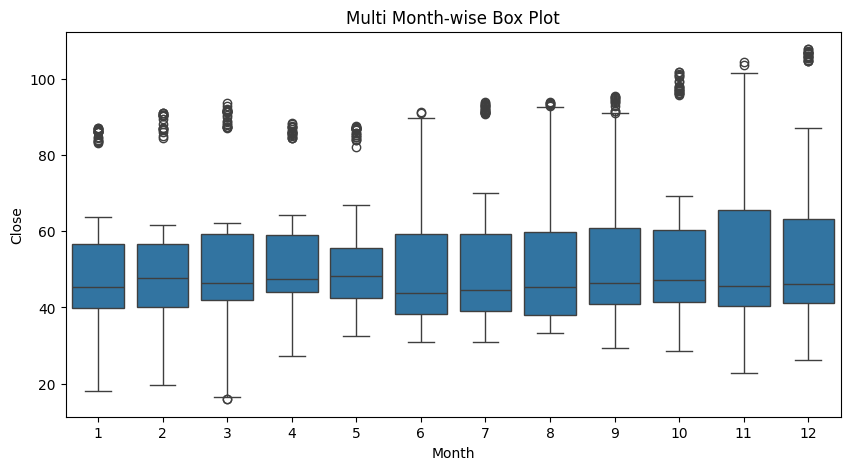

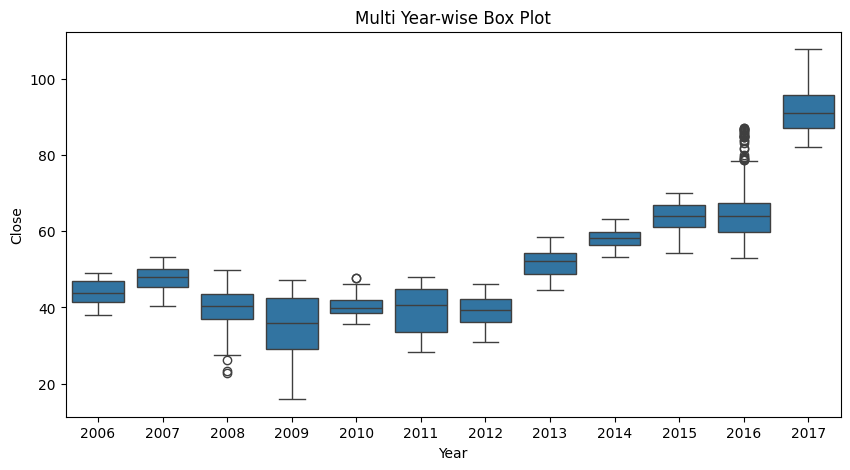

In [18]:
df['Day'] = df.index.day
plt.figure(figsize=(10,5))
sns.boxplot(x = 'Day',y = 'Close',data = df)
plt.title('Multi Day-wise Box Plot')
plt.show()
df.drop('Day',axis = 1,inplace = True)

df['Month'] = df.index.month
plt.figure(figsize=(10,5))
sns.boxplot(x = 'Month',y = 'Close',data = df)
plt.title('Multi Month-wise Box Plot')
plt.show()
df.drop('Month',axis = 1,inplace = True)

df['Year'] = df.index.year
plt.figure(figsize=(10,5))
sns.boxplot(x = 'Year',y = 'Close',data = df)
plt.title('Multi Year-wise Box Plot')
plt.show()
df.drop('Year',axis = 1,inplace = True)

In [19]:
results = adfuller(df['Close'])
print('Test statistic =',results[0])
print('P-value =',results[1])
print("No of lags =",results[2])
print("""Critical Values :-
    1% = {},
    5% = {},
    10% = {}""".format(results[4]['1%'],results[4]['5%'],results[4]['10%']))

Test statistic = 1.1085627487099894
P-value = 0.9952890436424576
No of lags = 29
Critical Values :-
    1% = -3.4325389374354,
    5% = -2.862507130612779,
    10% = -2.5672848292524693


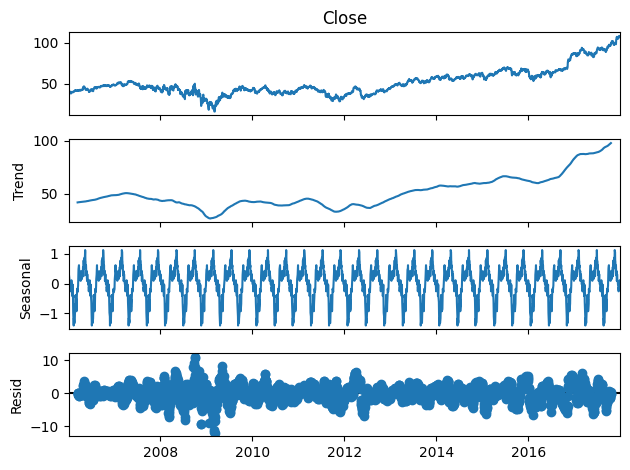

In [20]:
decomposed = seasonal_decompose(df['Close'],model = 'additive',period=100)

decomposed.plot()
plt.show()

In [21]:
scaler = MinMaxScaler((0,1))
df1 = scaler.fit_transform(np.array(df['Close']).reshape(-1,1))

train_size = int(len(df1)*0.7)

train = df1[:train_size]
test = df1[train_size:]

In [38]:
def create_dataset(X,time_step):
  dataX,dataY = [],[]
  for i in range(len(X)-time_step-1):
    a = X[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(X[i+time_step,0])
  return np.array(dataX),np.array(dataY)

X_train,y_train = create_dataset(train,100)
X_test,y_test = create_dataset(test,100)

In [39]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [40]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.models import model_from_json
from keras.layers import Dense, LSTM, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping

In [181]:
model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape = (100,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam',metrics = ['mse'])

In [182]:
model.summary()
es = EarlyStopping(monitor = 'val_loss',mode = 'min',patience = 5,verbose = 1)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_29 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_30 (LSTM)              (None, 50)                20200     
                                                                 
 dense_31 (Dense)            (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [183]:
history = model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 100,verbose = 1,callbacks = [es])

Epoch 1/100
63/63 [==============================] - 9s 70ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 2/100
63/63 [==============================] - 1s 20ms/step - loss: 6.6929e-04 - mse: 6.6929e-04 - val_loss: 6.8044e-04 - val_mse: 6.8044e-04
Epoch 3/100
63/63 [==============================] - 1s 12ms/step - loss: 4.9333e-04 - mse: 4.9333e-04 - val_loss: 5.0508e-04 - val_mse: 5.0508e-04
Epoch 4/100
63/63 [==============================] - 1s 12ms/step - loss: 4.6949e-04 - mse: 4.6949e-04 - val_loss: 4.9919e-04 - val_mse: 4.9919e-04
Epoch 5/100
63/63 [==============================] - 1s 13ms/step - loss: 4.5418e-04 - mse: 4.5418e-04 - val_loss: 5.6631e-04 - val_mse: 5.6631e-04
Epoch 6/100
63/63 [==============================] - 1s 12ms/step - loss: 4.2061e-04 - mse: 4.2061e-04 - val_loss: 4.3572e-04 - val_mse: 4.3572e-04
Epoch 7/100
63/63 [==============================] - 1s 13ms/step - loss: 4.0443e-04 - mse: 4.0443e-04 - val_loss: 3.9509e-04 - 

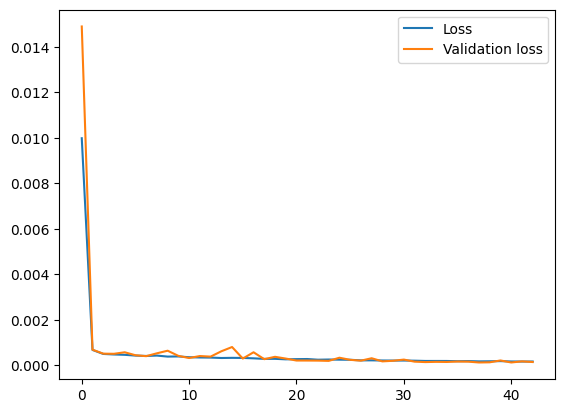

In [184]:
plt.plot(history.history['loss'],label = 'Loss')
plt.plot(history.history['val_loss'],label = 'Validation loss')
plt.legend(loc = 'best')
plt.show()

In [185]:
model_json = model.to_json()
with open('model.json','w') as json_file:
  json_file.write(model_json)
model.save_weights("model_weights.h5")
print("Saved model to disk")

Saved model to disk


In [136]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("model_weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [186]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

26/26 [==============================] - 0s 6ms/step


In [187]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test,test_predict))

73.1554543532558

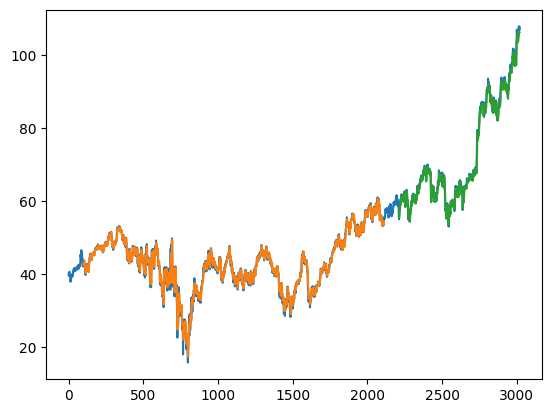

In [188]:
shift = 100

trainPredict = np.empty_like(df1)
trainPredict[:,:] = np.nan
trainPredict[shift:len(train_predict)+shift, :] = train_predict

testPredict = np.empty_like(df1)
testPredict[:,:] = np.nan
testPredict[len(train_predict) + (shift*2) + 1:len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredict)
plt.plot(testPredict)
plt.show()

In [189]:
x_input = test[806:].reshape(1,-1)
temp_input = list(x_input)[0].tolist()

output = []
i = 0

while i < 30:

  if len(temp_input)>100:
      x_input = np.array(temp_input[1:])
      x_input = x_input.reshape(1,-1)
      x_input = x_input.reshape((1,100,1))
      y_hat = model.predict(x_input,verbose = 0)
      temp_input = temp_input[1:]
      temp_input.extend(y_hat[0].tolist())
      output.extend(y_hat.tolist())
      i = i+1

  else:
      x_input = x_input.reshape((1,100,1))
      y_hat = model.predict(x_input,verbose = 0)
      temp_input.extend(y_hat[0].tolist())
      output.extend(y_hat.tolist())
      i = i+1

print(output)

[[0.9821063280105591], [0.9739943146705627], [0.9665150046348572], [0.9600196480751038], [0.954429030418396], [0.9495300650596619], [0.9450744986534119], [0.9408463835716248], [0.9366915822029114], [0.9325191378593445], [0.9282893538475037], [0.9239977598190308], [0.9196587800979614], [0.9152938723564148], [0.9109245538711548], [0.9065674543380737], [0.9022341966629028], [0.8979313969612122], [0.8936618566513062], [0.8894259333610535], [0.8852229714393616], [0.8810518383979797], [0.876911461353302], [0.8728012442588806], [0.8687207102775574], [0.8646698594093323], [0.860648512840271], [0.8566569089889526], [0.8526950478553772], [0.8487627506256104]]


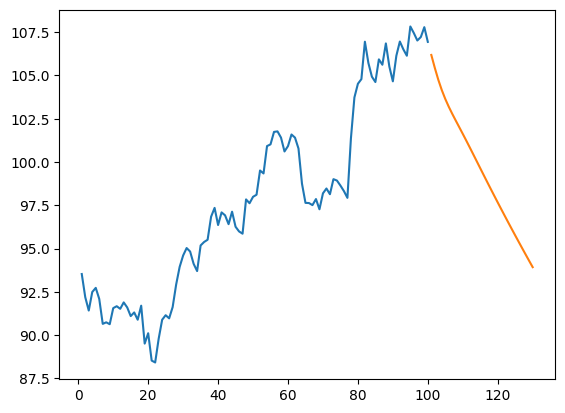

In [190]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

plt.plot(day_new,scaler.inverse_transform(df1[2920:]))
plt.plot(day_pred,scaler.inverse_transform(output))

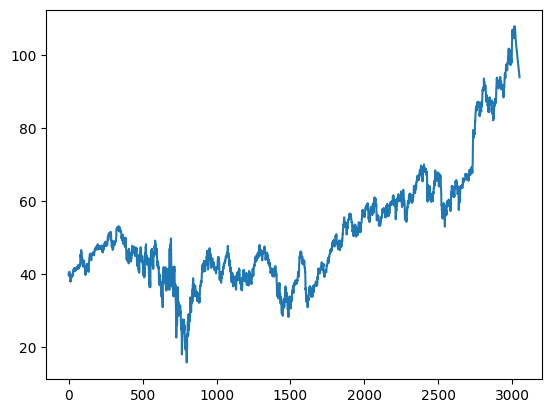

In [191]:
df3 = df1.tolist()
df3.extend(output)
df3 = scaler.inverse_transform(df3).tolist()
plt.plot(df3)